# LifeLens: Clustering & Fitting

## Importing Libraries and Dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv('Life-Expectancy-Data-Averaged.csv')

## Basic EDA

In [8]:
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      179 non-null    object 
 1   Region                       179 non-null    object 
 2   Year                         179 non-null    float64
 3   Infant_deaths                179 non-null    float64
 4   Under_five_deaths            179 non-null    float64
 5   Adult_mortality              179 non-null    float64
 6   Alcohol_consumption          179 non-null    float64
 7   Hepatitis_B                  179 non-null    float64
 8   Measles                      179 non-null    float64
 9   BMI                          179 non-null    float64
 10  Polio                        179 non-null    float64
 11  Diphtheria                   179 non-null    float64
 12  Incidents_HIV                179 non-null    float64
 13  GDP_per_capita      

In [10]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status                 0
Life_expectancy                0
dtype: int64

In [11]:
df.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
count,179.0,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2007.5,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.793296,68.856075
std,0.0,26.725485,42.916952,111.659044,3.914554,13.820223,17.315208,2.165490,13.581153,13.931532,2.311895,16893.054182,136.655286,4.111094,4.195663,3.126912,0.406077,9.197699
min,2007.5,2.381250,3.000000,57.710313,0.000025,30.687500,16.250000,20.212500,35.750000,31.312500,0.010000,263.937500,0.085000,0.100000,0.100000,1.337500,0.000000,45.606250
25%,2007.5,8.159375,9.775000,107.046906,1.317813,78.218750,64.000000,23.225000,80.531250,80.812500,0.080000,1409.906250,2.108125,1.756250,1.731250,4.946875,1.000000,62.303125
50%,2007.5,19.368750,23.137500,164.432406,4.209375,88.000000,83.000000,25.650000,92.375000,92.062500,0.164375,4402.625000,7.660625,3.556250,3.718750,7.831250,1.000000,71.506250
75%,2007.5,48.959375,68.321875,247.523922,7.843438,94.375000,92.250000,26.425000,96.062500,95.781250,0.516250,12037.781250,22.745313,7.165625,7.056250,10.365625,1.000000,74.937500
max,2007.5,115.718750,178.725000,572.974312,15.100000,98.875000,99.000000,31.687500,98.937500,99.000000,18.164375,102972.687500,1321.239375,27.100000,27.943750,13.268750,1.000000,82.456250


## Correlation Heatmap

In [13]:
def plot_correlation_heatmap(data, title):
    """
    Generates and displays a correlation heatmap.
    """

    if isinstance(data, dict):
        data = pd.DataFrame(data)
    numeric_df = data.select_dtypes(include=['number'])
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(10, 8))

    # Plot the heatmap
    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap="flare", 
        fmt='.2f', 
        annot_kws={"size": 7},  
        linewidths=0.5, 
        cbar_kws={'shrink': 0.8}
    )

    plt.title(title, fontsize=20, weight='bold')
    plt.xticks(fontsize=12, rotation=45, ha='right')
    plt.yticks(fontsize=12, rotation=0)
    plt.tight_layout()
    plt.show()

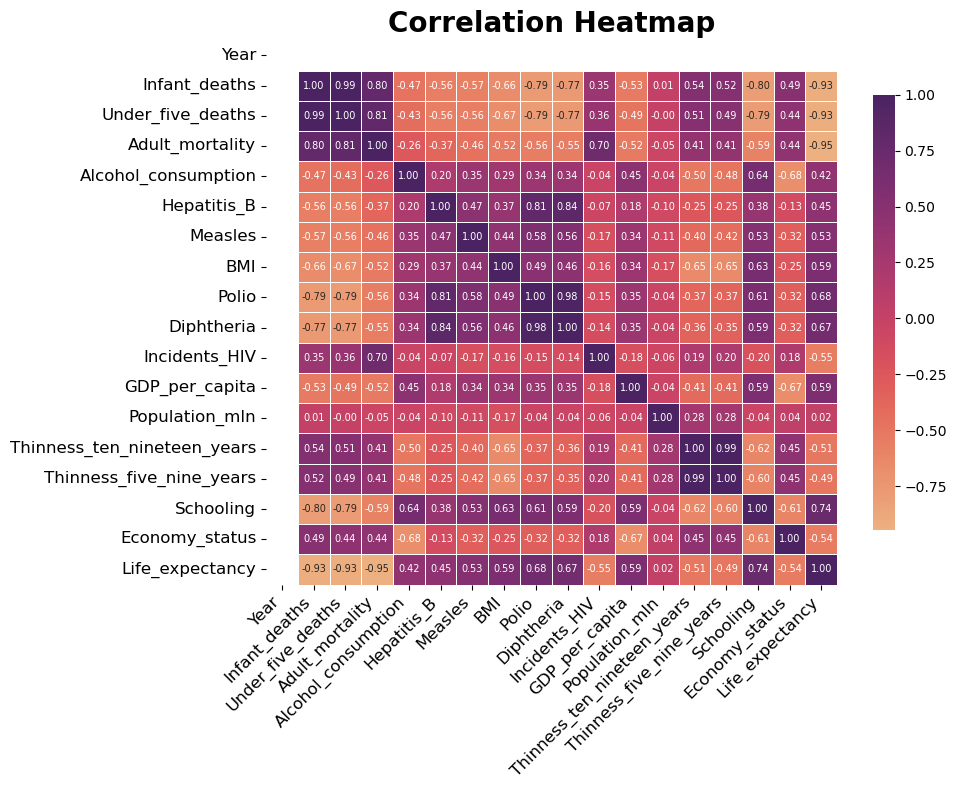

In [14]:
plot_correlation_heatmap(df, title="Correlation Heatmap")

## Scatter Plot

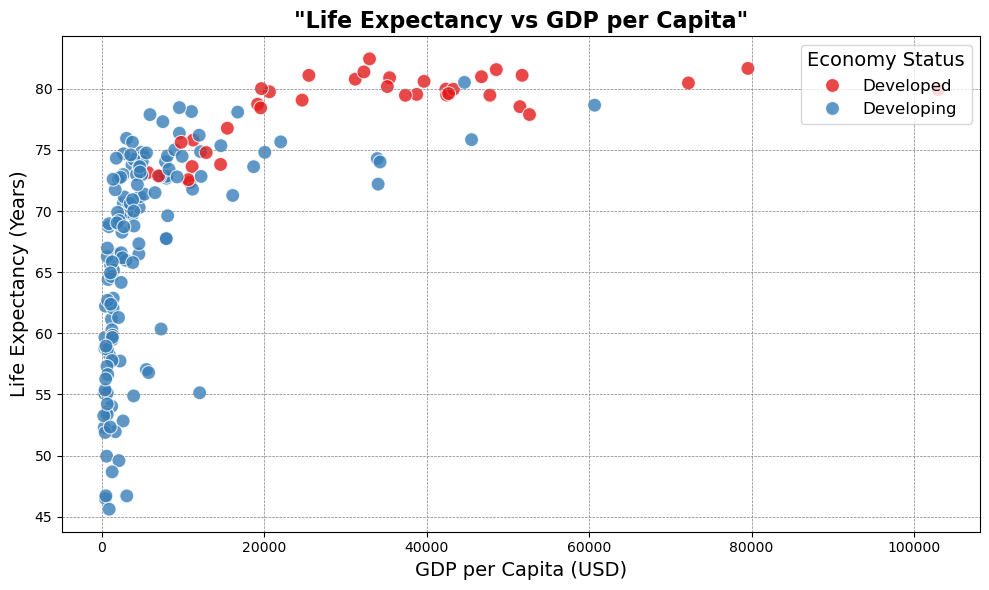

In [49]:
def scatter_plot(data, x, y, title, xlabel, ylabel, hue, legend_title):
    """
    Plots a scatter plot with customizable x and y axes, title, labels, and legend.
    """

    plt.figure(figsize=(10, 6))
    
    # Create the scatter plot
    scatter = sns.scatterplot(
        data=data,
        x=x,
        y=y,
        hue=hue,
        palette='Set1',        
        alpha=0.8,             
        edgecolor='w',         
        s=100,                 
        hue_order=[0.0, 1.0]   
    )
    

    handles, labels = scatter.get_legend_handles_labels()
    labels = ['Developed' if label == '0.0' else 'Developing' for label in labels]
    plt.legend(handles=handles, labels=labels, title=legend_title, fontsize=12, title_fontsize=14, loc='upper right')

    plt.title(title, fontsize=16, fontweight='bold')         
    plt.xlabel(xlabel, fontsize=14)                          
    plt.ylabel(ylabel, fontsize=14)  
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

scatter_plot(df, x='GDP_per_capita', y='Life_expectancy', 
              title='"Life Expectancy vs GDP per Capita"', 
              xlabel='GDP per Capita (USD)', ylabel='Life Expectancy (Years)', 
              hue='Economy_status', legend_title='Economy Status')


## Box Plot

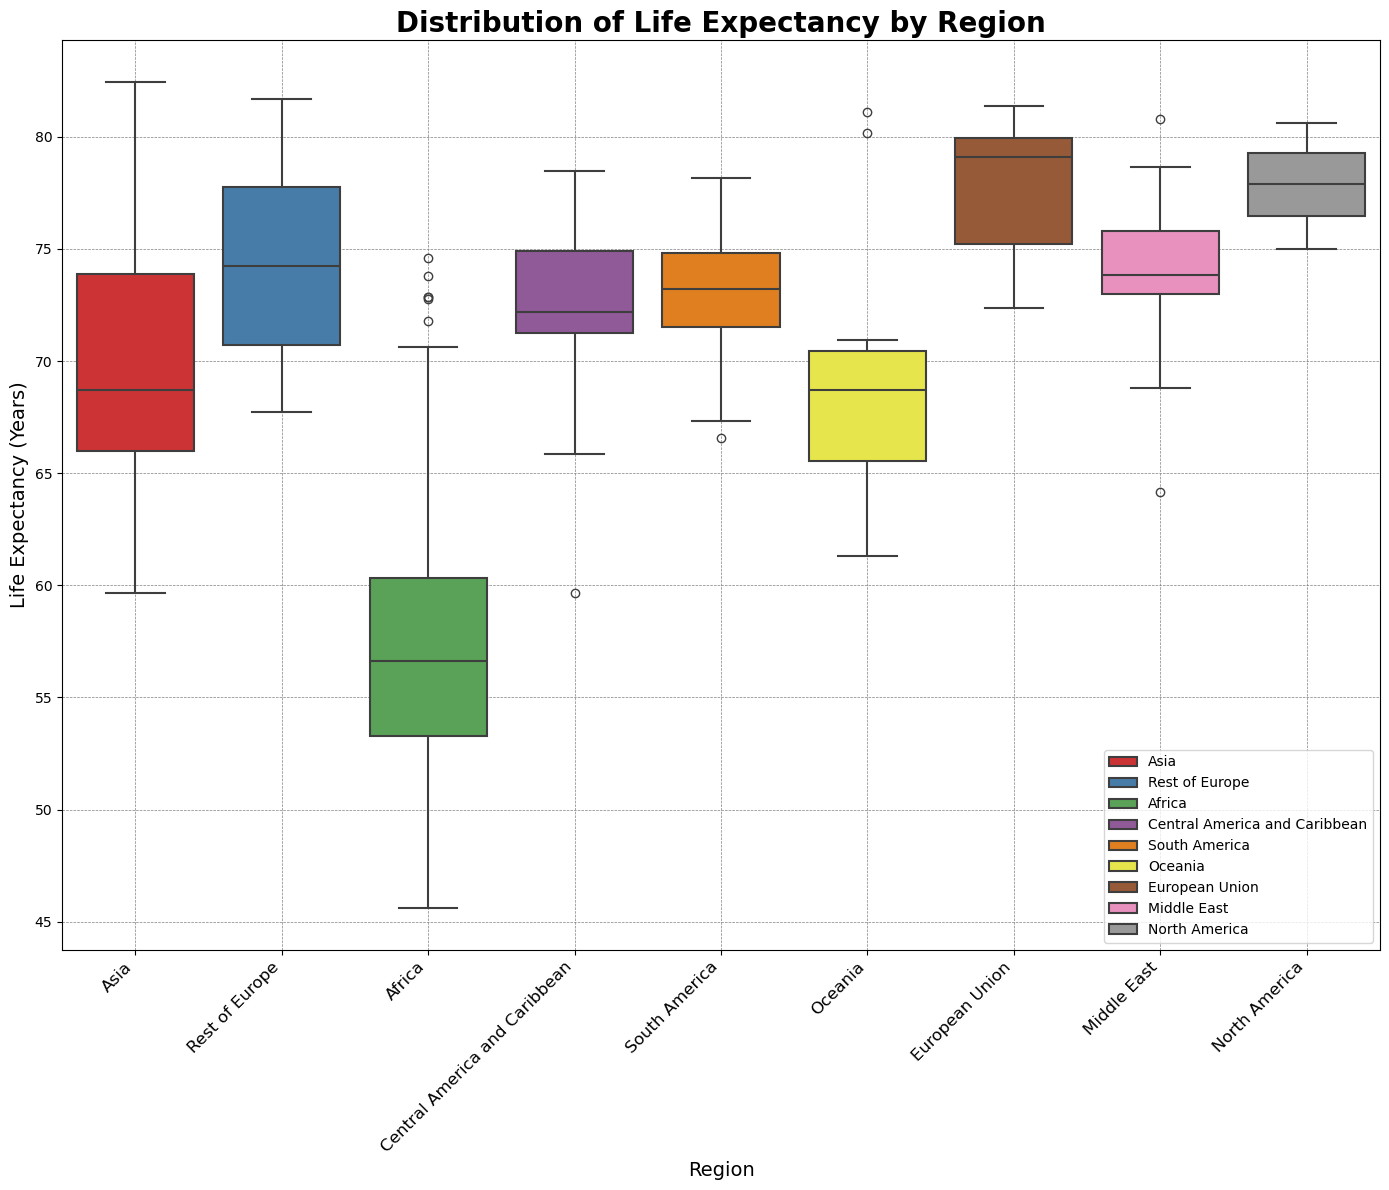

In [71]:
def box_plot(data, title, xlabel, ylabel):
    """
    Plots a boxplot with customizable title and labels.
    """
    plt.figure(figsize=(14, 12))
    
    # Create the boxplot
    boxplot = sns.boxplot(
        data=data,
        x='Region',
        y='Life_expectancy',
        hue='Region',           
        palette="Set1",        
        linewidth=1.5,          
        legend=True           
    )

    plt.title(title, fontsize=20, fontweight='bold')  
    plt.xlabel(xlabel, fontsize=14)  
    plt.ylabel(ylabel, fontsize=14) 
    plt.xticks(rotation=45, ha='right', fontsize=12) 
    plt.legend(loc='lower right')
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout() 
    plt.show()


box_plot(df, title="Distribution of Life Expectancy by Region", 
        xlabel="Region", ylabel="Life Expectancy (Years)")


## Polynomial Fit Plot

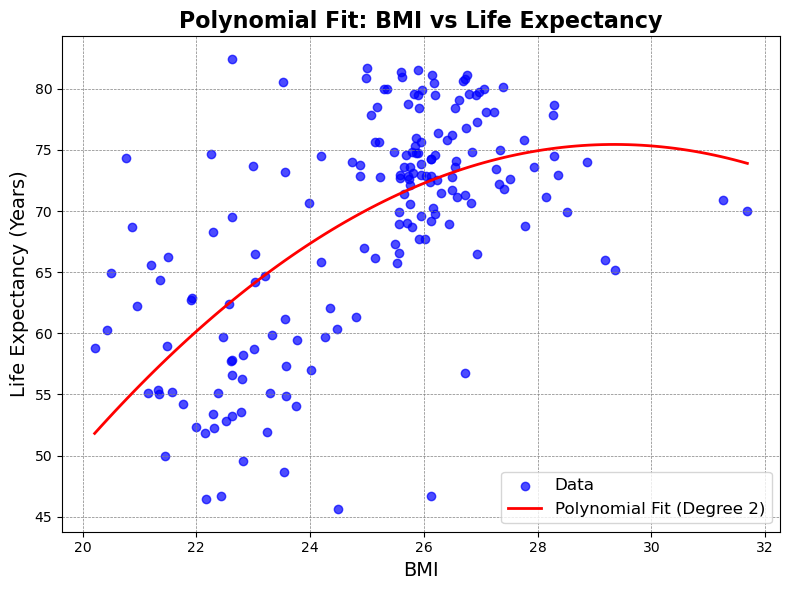

In [112]:
def polynomial_fit_plot(data, x_column, y_column, title, xlabel, ylabel):
    """
    Plots a polynomial fit (degree 2) along with the data points.
    """
    plt.figure(figsize=(8, 6))

    # Fit a polynomial of degree 2 (quadratic)
    p = np.poly1d(np.polyfit(data[x_column], data[y_column], 2))
    
    x_line = np.linspace(data[x_column].min(), data[x_column].max(), 100)
    y_line = p(x_line)
    
    # Plotting
    plt.scatter(data[x_column], data[y_column], color='blue', label="Data", alpha=0.7)
    plt.plot(x_line, y_line, color='red', label='Polynomial Fit (Degree 2)', lw=2)
    
   
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


polynomial_fit_plot(df, 'BMI', 'Life_expectancy', 
                    title="Polynomial Fit: BMI vs Life Expectancy", 
                    xlabel="BMI", ylabel="Life Expectancy (Years)")


## Elbow Method for Optimal Clusters

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

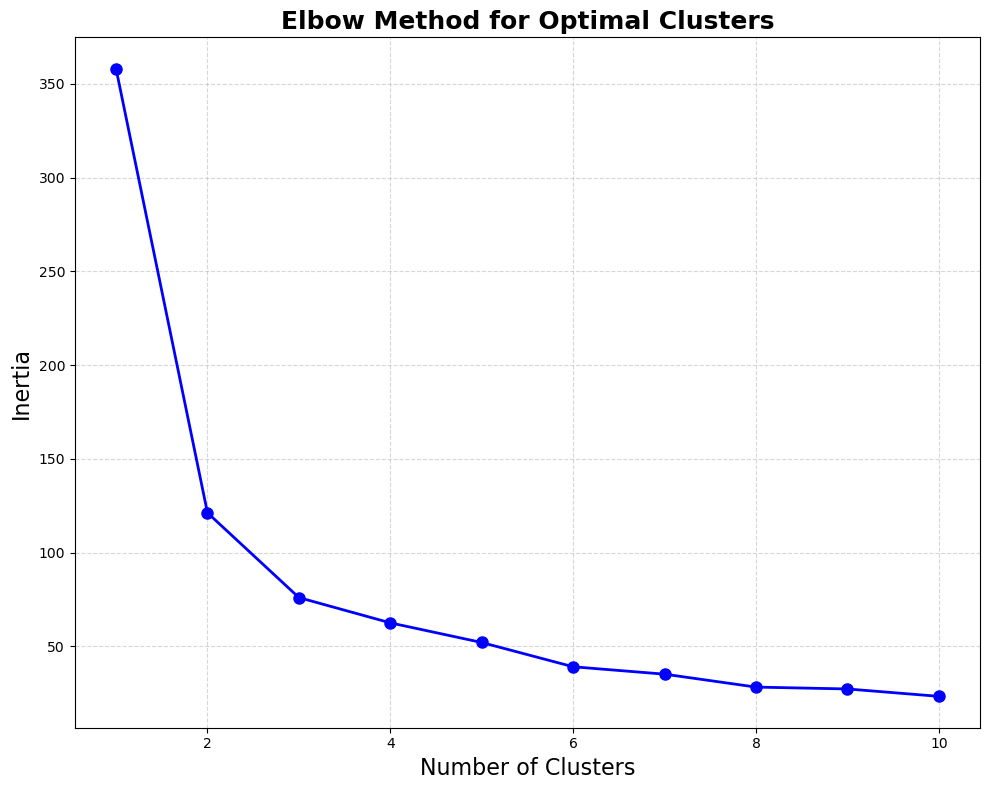

In [91]:
def plot_elbow_method(data, features, max_clusters=10):
    """
    Plot the Elbow Method to determine the optimal number of clusters.
    """
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[features])
    
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(scaled_data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o', color='b', linewidth=2, markersize=8)
    plt.title('Elbow Method for Optimal Clusters', fontsize=18, fontweight='bold')
    plt.xlabel('Number of Clusters', fontsize=16)
    plt.ylabel('Inertia', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout() 
    plt.show()

features = ['Schooling', 'Life_expectancy']
plot_elbow_method(df, features, max_clusters=10)

## Clustering

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


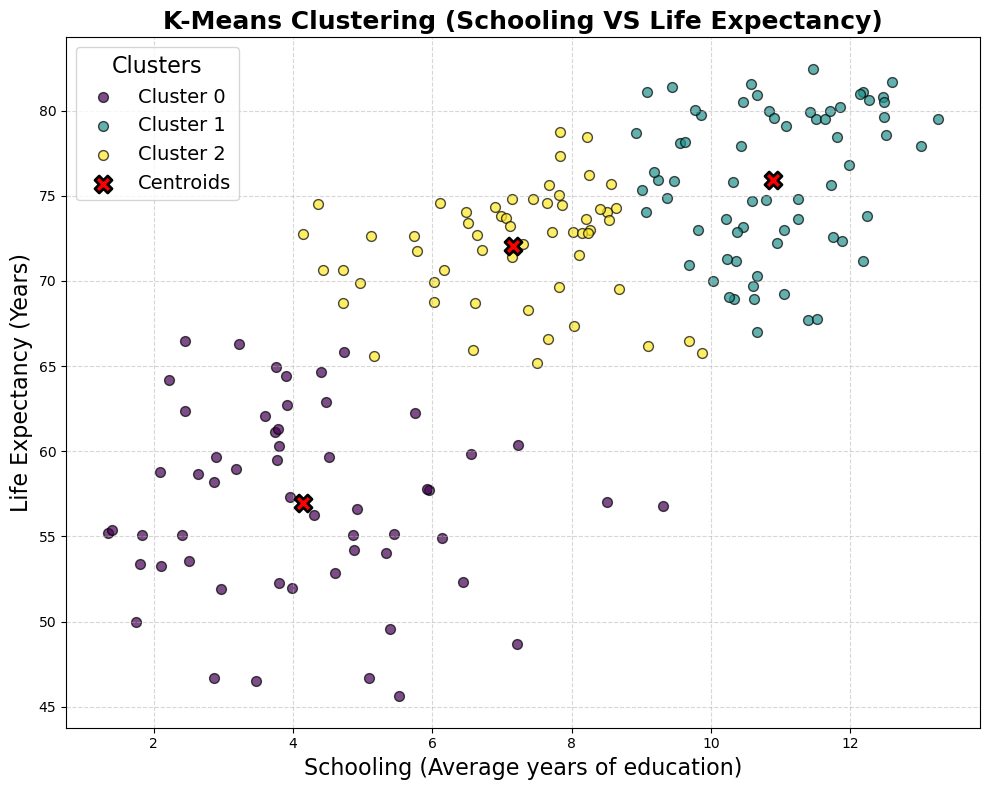

In [99]:
def perform_clustering(data, features, n_clusters=3):
    """
    Perform K-means clustering.
    """
    # Scaling data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[features])

    # Fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    
    # Back-scaling the cluster centers
    back_scaled_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    
    return {
        'labels': labels,
        'centers': back_scaled_centers,
        'scaled_data': scaled_data,
    }

def plot_clustering(data, features, clustering_results, xlabel, ylabel, title):
    """
    Plot the clustering results with colored groups and cluster centers.
    """
    labels = clustering_results['labels']
    centers = clustering_results['centers']
    
    plt.figure(figsize=(10, 8))
    
    # Scatter plot for each cluster
    unique_labels = np.unique(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels))) 
    
    for i, label in enumerate(unique_labels):
        cluster_data = data[features][labels == label]
        plt.scatter(
            cluster_data[features[0]], 
            cluster_data[features[1]], 
            label=f'Cluster {label}', 
            alpha=0.7,
            color=colors[i],  
            edgecolors='black', 
            s=50
        )
    
    # Plot cluster centers
    plt.scatter(
        centers[:, 0], centers[:, 1],
        c='red', marker='X', s=150, label='Centroids', edgecolors='black', linewidth=2
    )
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.legend(fontsize=14, title="Clusters", title_fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Perform clustering
clustering_results = perform_clustering(df, features, n_clusters=3)
# Plot clustering results
plot_clustering(df, features, clustering_results,
                xlabel = 'Schooling (Average years of education)',
                ylabel = 'Life Expectancy (Years)',
                title = 'K-Means Clustering (Schooling VS Life Expectancy)')

## Fitting

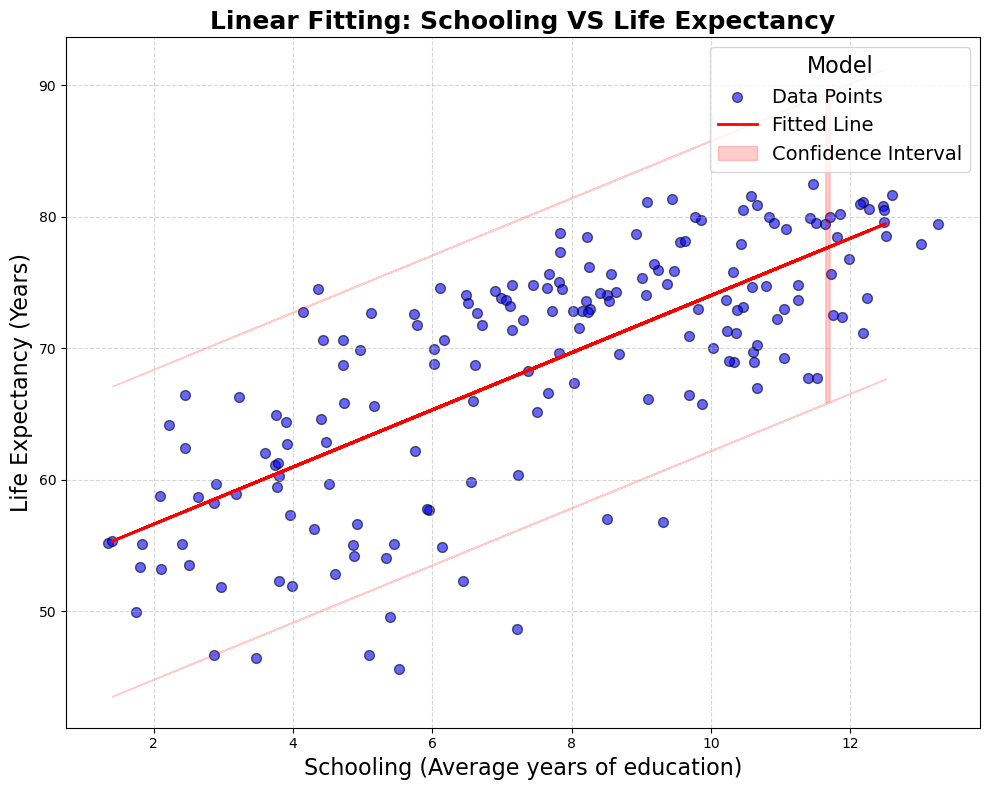

In [103]:
def fit_linear_model(data, x_column, y_column):
    """
    Fit a linear regression model to the data.
    """
    X = data[[x_column]].values
    y = data[y_column].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    confidence_interval = 1.96 * np.sqrt(mse)
    
    return {
        'model': model,
        'predictions': y_pred,
        'test_data': (X_test, y_test),
        'confidence_interval': confidence_interval,
        'mse': mse
    }

def plot_fitting(data, fit_results, x_column, y_column, xlabel, ylabel, title):
    """
    Plot the linear fitting results with confidence intervals and error bars.
    """
    model = fit_results['model']
    X_test, y_test = fit_results['test_data']
    predictions = fit_results['predictions']
    confidence_interval = fit_results['confidence_interval']
    
    plt.figure(figsize=(10, 8))
    # Scatter plot of the original data points
    plt.scatter(data[x_column], data[y_column], alpha=0.6, label='Data Points', c='blue', edgecolors='black', s=50)
    
    # Plot the fitted line
    plt.plot(X_test, predictions, color='red', linewidth=2, label='Fitted Line')
    
    # Fill the area between the confidence intervals
    plt.fill_between(
        X_test.flatten(),
        predictions - confidence_interval,
        predictions + confidence_interval,
        color='red', alpha=0.2, label='Confidence Interval'
    )
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.legend(fontsize=14, title="Model", title_fontsize=16)
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Linear Fitting
fit_results = fit_linear_model(df, 'Schooling', 'Life_expectancy')
plot_fitting(df, fit_results, 'Schooling', 'Life_expectancy',
            xlabel = 'Schooling (Average years of education)',
            ylabel = 'Life Expectancy (Years)',
            title = 'Linear Fitting: Schooling VS Life Expectancy')